### 

In [16]:
# install packages
%pip install pandas numpy matplotlib seaborn joblib scikit-learn nltk

Note: you may need to restart the kernel to use updated packages.


### importing libraries

In [17]:
# Import libraries
import pandas as pd
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

### download nltk data

In [18]:
# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sigei\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sigei\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sigei\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

### dataset

In [19]:
# Load the dataset
data = pd.read_csv("./fake_reviews_dataset.csv")

### Preposeccessing technique

In [20]:
# Data preprocessing
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)

data['clean_text'] = data['text_'].apply(preprocess_text)

### Feature engineering 

In [21]:
# Feature Engineering
X = data['clean_text']
y = data['label']

### Splitting data into train and test sets, 20% test set size and random state 42

In [22]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Pipeline definition

In [23]:
# Define pipeline
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', LogisticRegression(max_iter=1000))
])

### Hypermeter definition

In [24]:
# Define hyperparameters grid for grid search
param_grid = {
    'tfidf__max_features': [1000, 2000, 3000],
    'tfidf__ngram_range': [(1, 1), (1, 2)],
    'clf__C': [0.1, 1, 10]
}

### Grid search for the best hyperparameters for the model

In [25]:
# Grid search for hyperparameter tuning
grid_search = GridSearchCV(pipeline, param_grid, cv=5, verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                       ('clf',
                                        LogisticRegression(max_iter=1000))]),
             n_jobs=-1,
             param_grid={'clf__C': [0.1, 1, 10],
                         'tfidf__max_features': [1000, 2000, 3000],
                         'tfidf__ngram_range': [(1, 1), (1, 2)]},
             verbose=2)

### Best hyperparameter 

In [26]:
# Best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'clf__C': 10, 'tfidf__max_features': 3000, 'tfidf__ngram_range': (1, 2)}


### Model Description

In [27]:
# Evaluate model
y_pred = grid_search.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

          CG       0.89      0.88      0.89      4016
          OR       0.88      0.89      0.89      4071

    accuracy                           0.89      8087
   macro avg       0.89      0.89      0.89      8087
weighted avg       0.89      0.89      0.89      8087

Accuracy: 0.886608136515395


#### Vizualization

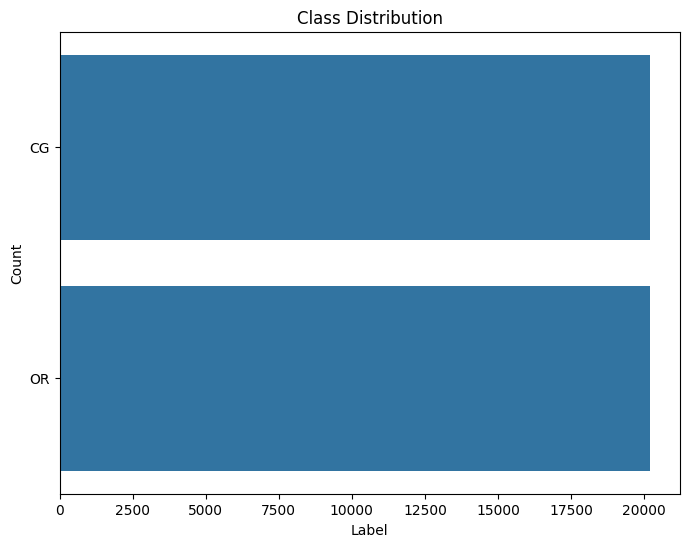

In [28]:
# Visualization of class distribution in the dataset
plt.figure(figsize=(8, 6))
sns.countplot(data['label'])
plt.title('Class Distribution')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

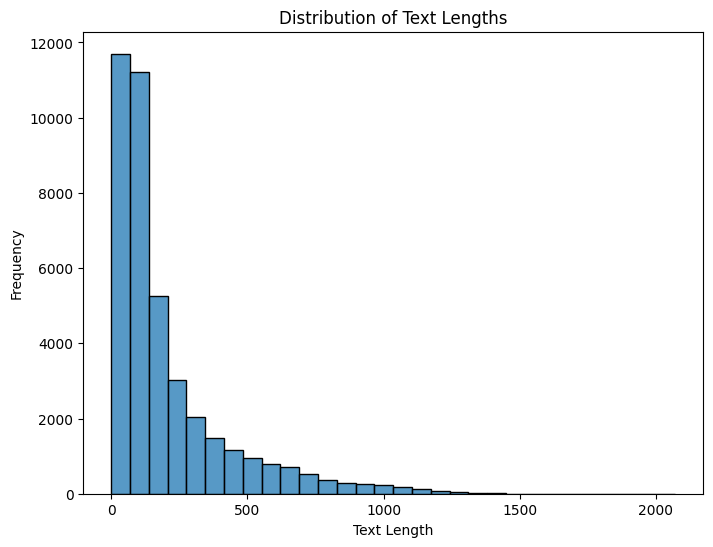

In [29]:
# Visualization of distribution of text lengths
text_lengths = data['clean_text'].apply(len)
plt.figure(figsize=(8, 6))
sns.histplot(text_lengths, bins=30)
plt.title('Distribution of Text Lengths')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

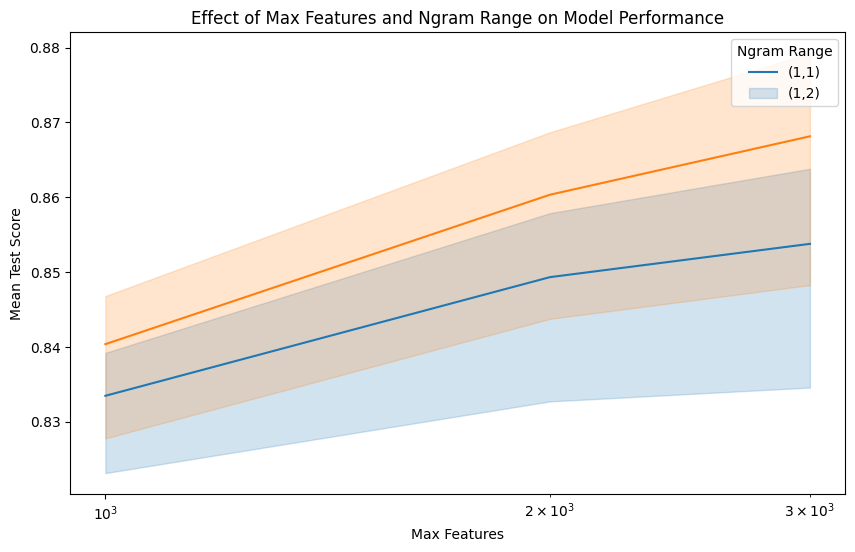

In [30]:
# Visualization of effect of Hyperparameters on Model Performance
param_results = pd.DataFrame(grid_search.cv_results_)
plt.figure(figsize=(10, 6))
sns.lineplot(data=param_results, x='param_tfidf__max_features', y='mean_test_score', hue='param_tfidf__ngram_range')
plt.xscale('log')
plt.title('Effect of Max Features and Ngram Range on Model Performance')
plt.xlabel('Max Features')
plt.ylabel('Mean Test Score')
plt.legend(title='Ngram Range', labels=['(1,1)', '(1,2)'])
plt.show()